# LC-MS Decoding Demo

This demo demonstrates how to use the `LCMSMeasMan` and `LCMSUVMeasMan` measurement managers to process and analyze LC-MS data (with and without UV-Vis detection) from `.mzXML` files:

- Load and process LC-MS data from mzML files
- Perform peak picking with strict boundary detection
- Extract MS spectra at peak apexes
- Visualize TIC with detected peaks, boundaries, and local maxima
- Plot MS spectra at specific retention times
- Access peak information programmatically

This notebook requires the `ppenv` conda environment to be activated. 

## Decoding LC-MS Data Without UV-Vis Files

If an LC-MS machine does not have UV-Vis capabilities, instantiate a `LCMSMeasMan` measurement manager to decode the associated `.mzXML` file and perform MS/RT analysis on.

### Step 1: Load LC-MS Data

Load msdata30.mzXML file and initialize the `LCMSMeasMan`. The class automatically:
- Loads the mzML file
- Calculates the Total Ion Chromatogram (TIC)
- Applies baseline correction
- Detects available MS polarities (positive and negative)
- Auto-selects polarity (defaults to positive if available, otherwise negative)
- Performs peak picking with strict boundary detection
- Extracts MS spectra for each detected peak

A note that you can explicitly specify the polarity of the MS process (1 for positive, -1 for negative) or let it auto-detect.


In [1]:
import sys
from pathlib import Path

project_root = Path('.').resolve().parent
if str(project_root) not in sys.path:
    sys.path.insert(0, str(project_root))

from decoding.LCMS_meas_man import LCMSMeasMan

mzml_path = "../data/msdata30.mzXML"

meas_man = LCMSMeasMan(mzml_path, polarity=None)

print("\nCreated LCMSMeasMan Object From msdata30.mzXML!")

print(meas_man)



Determination of memory status is not supported on this 
 platform, measuring for memoryleaks will never fail


Loading ../data/msdata30.mzXML...
Detected mzXML format
Auto-selected: MS+ (positive mode) - 1800 points found
MS+ only data: 1800 points
RT range: 0.00 - 359.80 s (0.00 - 6.00 min)
Found 20 peak apexes
Peak 1: RT=16.200 s, Boundaries: 14.600 - 17.800 s, Local maxima: 1
Peak 2: RT=33.400 s, Boundaries: 31.800 - 34.800 s, Local maxima: 3
Peak 3: RT=45.800 s, Boundaries: 41.800 - 45.800 s, Local maxima: 2
Peak 4: RT=62.400 s, Boundaries: 58.000 - 62.400 s, Local maxima: 3
Peak 5: RT=78.400 s, Boundaries: 74.000 - 78.600 s, Local maxima: 4
Peak 6: RT=121.400 s, Boundaries: 116.800 - 122.600 s, Local maxima: 3
Peak 7: RT=131.000 s, Boundaries: 126.800 - 131.400 s, Local maxima: 1
Peak 8: RT=165.000 s, Boundaries: 160.400 - 169.600 s, Local maxima: 4
Peak 9: RT=171.600 s, Boundaries: 170.400 - 172.000 s, Local maxima: 0
Peak 10: RT=173.800 s, Boundaries: 172.200 - 174.400 s, Local maxima: 0
Peak 11: RT=185.800 s, Boundaries: 181.400 - 187.000 s, Local maxima: 2
Peak 12: RT=199.600 s, Bounda

### Step 2: Inspect Detected Peaks

Get information about all detected peaks, including apex retention times, boundaries, and local maxima.

In [2]:
print(f"Total peaks detected: {len(meas_man)}")
print(f"Polarity used: {meas_man.polarity_label}")
print(f"\nPeak apex retention times (min):")
apex_times = meas_man.get_apex_times()
for i, rt in enumerate(apex_times, 1):
    print(f"  Peak {i}: {rt:.3f} min")

# obtain comprehensive peak summary
all_peaks = meas_man.get_all_peaks()
print(f"\nDetailed peak information:")
for i, peak in enumerate(all_peaks, 1):
    print(f"\nPeak {i}:")
    print(f"  Apex RT: {peak['apex_rt']:.3f} min")
    print(f"  Apex Intensity: {peak['apex_intensity']:.2e}")
    print(f"  Boundaries: {peak['start_rt']:.3f} - {peak['end_rt']:.3f} min")
    print(f"  Peak Width: {peak['end_rt'] - peak['start_rt']:.3f} min")
    print(f"  Local Maxima: {len(peak['local_maxima_rt'])}")
    print(f"  MS Spectrum Points: {len(peak['ms_spectrum'])}")

Total peaks detected: 20
Polarity used: MS+

Peak apex retention times (min):
  Peak 1: 16.200 min
  Peak 2: 33.400 min
  Peak 3: 45.800 min
  Peak 4: 62.400 min
  Peak 5: 78.400 min
  Peak 6: 121.400 min
  Peak 7: 131.000 min
  Peak 8: 165.000 min
  Peak 9: 171.600 min
  Peak 10: 173.800 min
  Peak 11: 185.800 min
  Peak 12: 199.600 min
  Peak 13: 207.800 min
  Peak 14: 237.000 min
  Peak 15: 252.400 min
  Peak 16: 264.800 min
  Peak 17: 277.600 min
  Peak 18: 278.400 min
  Peak 19: 285.000 min
  Peak 20: 354.200 min

Detailed peak information:

Peak 1:
  Apex RT: 16.200 min
  Apex Intensity: 5.21e+07
  Boundaries: 14.600 - 17.800 min
  Peak Width: 3.200 min
  Local Maxima: 1
  MS Spectrum Points: 5500

Peak 2:
  Apex RT: 33.400 min
  Apex Intensity: 4.66e+07
  Boundaries: 31.800 - 34.800 min
  Peak Width: 3.000 min
  Local Maxima: 3
  MS Spectrum Points: 5500

Peak 3:
  Apex RT: 45.800 min
  Apex Intensity: 4.43e+07
  Boundaries: 41.800 - 45.800 min
  Peak Width: 4.000 min
  Local Ma

### Step 3: Access Individual Peak Information

Retrieve detailed information for a specific peak by its apex retention time.
Can return information on local maxima as well as the mass spectra associated with the peak apex.


In [3]:
# basic peak information
if len(apex_times) > 0:
    first_peak_rt = apex_times[0]
    peak_info = meas_man.get_peak(first_peak_rt)
    
    print(f"Peak at RT = {first_peak_rt:.3f} s:")
    print(f"  Intensity: {peak_info['apex_intensity']:.2e}")
    print(f"  Boundaries: {peak_info['start_rt']:.3f} - {peak_info['end_rt']:.3f} s")
    if peak_info['local_maxima_rt']:
        print(f"  Local Maxima RT: {[f'{rt:.3f}' for rt in peak_info['local_maxima_rt']]}")

# ms spectrum data at apex
if len(apex_times) > 0:
    first_peak_rt = apex_times[0]
    ms_spectrum = meas_man.get_ms_spectrum(first_peak_rt)
    
    if ms_spectrum:
        print(f"\nMS Spectrum for peak at RT = {first_peak_rt:.3f} s:")
        print(f"  Total m/z points: {len(ms_spectrum)}")
        print(f"\n  Top 10 most intense peaks:")
        sorted_spectrum = sorted(ms_spectrum, key=lambda x: x[1], reverse=True)
        for mz, intensity in sorted_spectrum[:10]:
            print(f"    m/z = {mz:.4f}, Intensity = {intensity:.2e}")
    else:
        print(f"No MS spectrum found for peak at RT = {first_peak_rt:.3f} s")


Peak at RT = 16.200 s:
  Intensity: 5.21e+07
  Boundaries: 14.600 - 17.800 s
  Local Maxima RT: ['17.400']

MS Spectrum for peak at RT = 16.200 s:
  Total m/z points: 5500

  Top 10 most intense peaks:
    m/z = 83.2611, Intensity = 2.41e+06
    m/z = 83.1611, Intensity = 2.26e+06
    m/z = 83.3611, Intensity = 2.25e+06
    m/z = 83.0611, Intensity = 1.85e+06
    m/z = 83.4611, Intensity = 1.82e+06
    m/z = 82.9611, Intensity = 1.32e+06
    m/z = 83.5611, Intensity = 1.26e+06
    m/z = 82.8611, Intensity = 8.04e+05
    m/z = 83.6612, Intensity = 7.17e+05
    m/z = 101.2625, Intensity = 4.90e+05


### Step 4: Visualize TIC with Peaks

Plot the Total Ion Chromatogram with detected peaks, boundaries, and local maxima annotated.


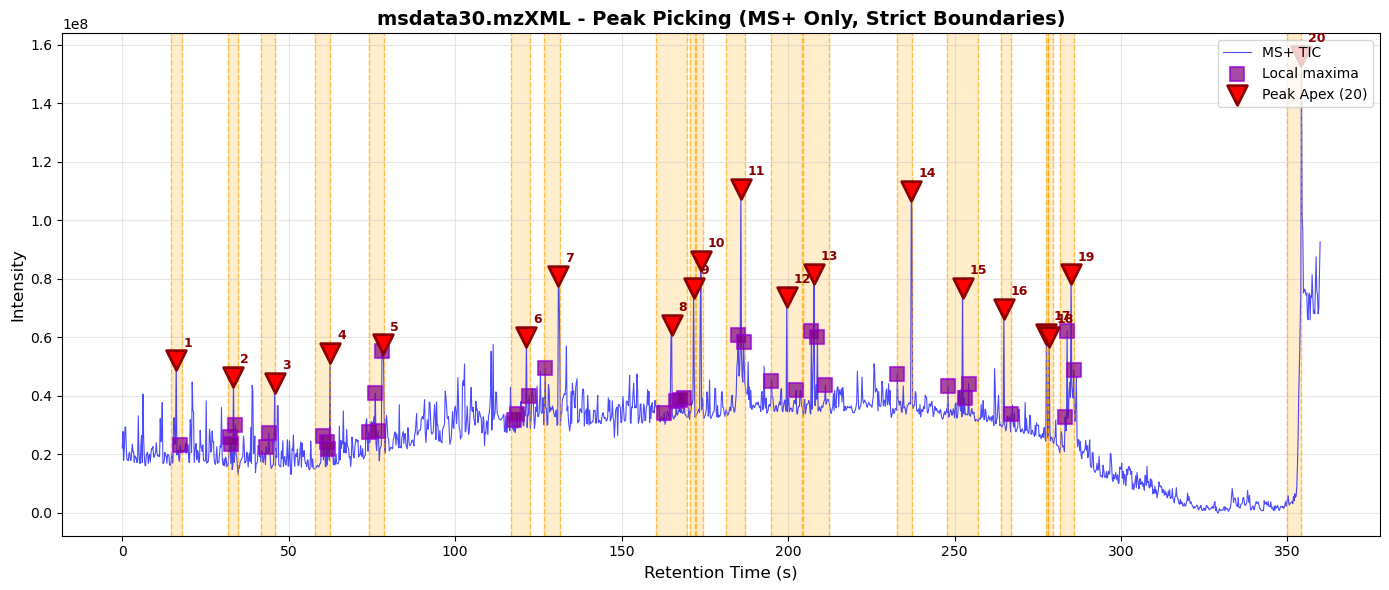

In [4]:
meas_man.plot_tic_with_peaks(show=True)

### Step 5: Plot MS Spectrum at a Target RT

Visualize the MS spectrum at a specific retention time. This is useful for identifying compounds at specific elution times.

The plot can also be limited with the `top_n` parameter to show only the top N most intense peaks for clearer visualization.

Plotting MS spectrum at RT = 12.000 min


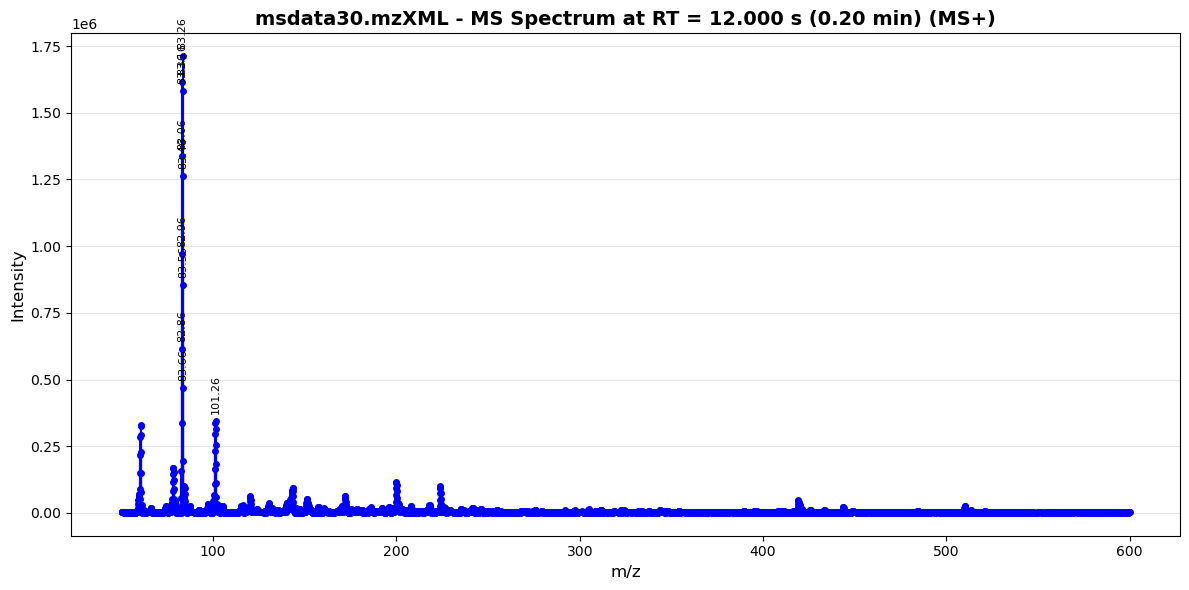

In [5]:
# full ms spectrum
if len(apex_times) > 0:
    target_rt = 12
    print(f"Plotting MS spectrum at RT = {target_rt:.3f} min")
    meas_man.plot_ms_spectrum(target_rt, tolerance=6.0, show=True)
else:
    print("No peaks found to plot spectrum")

Plotting top 20 MS peaks at RT = 16.200 min


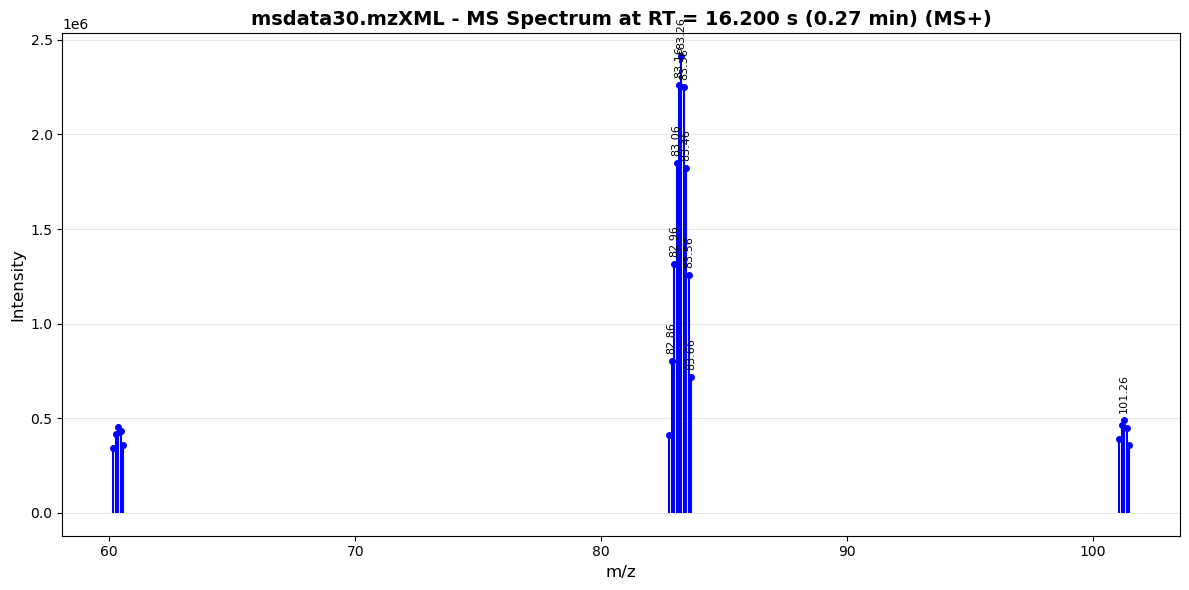

In [6]:
# partial ms spectrum
if len(apex_times) > 0:
    target_rt = apex_times[0]
    print(f"Plotting top 20 MS peaks at RT = {target_rt:.3f} min")
    meas_man.plot_ms_spectrum(target_rt, tolerance=20, top_n=20, show=True)

## Decoding LC-MS Data With UV-Vis Files

If an LC-MS machine does not have UV-Vis capabilities, instantiate a `LCMSUVMeasMan` measurement manager to decode the associated `.mzML` and `.csv`/`.txt`/`mocca_example` output files. This allows PeakProphet to easily perform MS/RT/Lambda Max analysis on each LC-MS peak.

### Step 1: Initialize LCMSUVMeasMan

Initialize `LCMSUVMeasMan` with both MS and UV-Vis data. Here we use mocca2 example_2 data for UV-Vis and E2.mzML for MS data.

The `LCMSUVMeasMan` class will:
- Load the mzML file for MS data
- Use mocca2 example data for UV-Vis
- Perform peak picking on UV-Vis data using mocca2's deconvolution
- Extract lambda max at each peak apex
- Extract MS spectra at each peak apex
- Store all peak information including boundaries and local maxima


In [7]:
from decoding.LCMSUV_meas_man import LCMSUVMeasMan
from mocca2 import example_data
from matplotlib import pyplot as plt
import pandas as pd

# loading mocca2 example data (example_2)
chromatogram = example_data.example_2()
print(f"Loaded mocca2 example_2 chromatogram")
print(f"Time range: {chromatogram.time[0]:.2f} - {chromatogram.time[-1]:.2f} s")
print(f"Wavelength range: {chromatogram.wavelength[0]:.0f} - {chromatogram.wavelength[-1]:.0f} nm")

chromatogram.correct_baseline()
print(f"\nApplied baseline correction to chromatogram")

mzml_path_uv = "../data/msdata30.mzXML"

# initialize with mocca2 example_2 data for UV-Vis and msdata30.mzXML for MS
lcmsuv_man = LCMSUVMeasMan(
    mzml_path=str(mzml_path_uv),
    use_example_data=True,
    ms_polarity=None 
)

print(f"\nInitialized LCMSUVMeasMan with mocca2 example_2 data for UV-Vis and msdata30.mzXML for MS!")
print(lcmsuv_man)


Loaded mocca2 example_2 chromatogram
Time range: 0.00 - 3.75 s
Wavelength range: 190 - 400 nm

Applied baseline correction to chromatogram
Loading MS data from ../data/msdata30.mzXML...
Loading ../data/msdata30.mzXML...
Detected mzXML format
Auto-selected: MS+ (positive mode) - 1800 points found
MS+ only data: 1800 points
RT range: 0.00 - 359.80 s (0.00 - 6.00 min)
Skipping TIC peak picking (peaks will be provided from external source)
Using mocca2 example data for UV-Vis...
No wavelength range specified, using default: 220-400 nm
Extracting wavelength range 220-400 nm...
Wavelength extraction complete. Data shape: (293, 4441)
Correcting baseline using flatfit method...
Baseline correction complete
Finding peaks...
  Data dimensions: 293 wavelengths × 4441 time points
Peak finding complete. Found 5 peaks
Skipping peak deconvolution (skip_deconvolution=True)
  If you need deconvolution, set skip_deconvolution=False
Peak 1: RT=0.052 min, Boundaries: 0.040 - 0.072 min, Lambda max: 220.8 n

### Step 2: Get Peak Properties

Displays basic information of each peak detected in the UV-Vis chromatogram.


In [8]:
print(f"Total peaks detected: {len(lcmsuv_man)}")
print(f"MS polarity used: {lcmsuv_man.ms_meas_man.polarity_label}")
print(f"\nPeak apex retention times (min):")
uvvis_apex_times = lcmsuv_man.get_apex_times()
for i, rt in enumerate(uvvis_apex_times, 1):
    print(f"  Peak {i}: {rt:.3f} min")

all_uvvis_peaks = lcmsuv_man.get_all_peaks()
print(f"\nDetailed peak information with UV-Vis and MS data:")
for i, peak in enumerate(all_uvvis_peaks, 1):
    print(f"\nPeak {i}:")
    print(f"  Apex RT: {peak['apex_rt']:.3f} min")
    print(f"  Apex Intensity (UV-Vis): {peak['apex_intensity']:.2e}")
    print(f"  Boundaries: {peak['start_rt']:.3f} - {peak['end_rt']:.3f} min")
    print(f"  Peak Width: {peak['end_rt'] - peak['start_rt']:.3f} min")
    print(f"  Lambda Max: {peak.get('lambda_max', 'N/A')} nm")
    print(f"  Local Maxima: {len(peak['local_maxima_rt'])}")
    print(f"  MS Spectrum Points: {len(peak['ms_spectrum'])}")
    if 'integral' in peak:
        print(f"  Peak Integral: {peak['integral']:.2f}")


Total peaks detected: 5
MS polarity used: MS+

Peak apex retention times (min):
  Peak 1: 0.052 min
  Peak 2: 0.452 min
  Peak 3: 1.486 min
  Peak 4: 1.733 min
  Peak 5: 2.278 min

Detailed peak information with UV-Vis and MS data:

Peak 1:
  Apex RT: 0.052 min
  Apex Intensity (UV-Vis): 8.65e+00
  Boundaries: 0.040 - 0.072 min
  Peak Width: 0.032 min
  Lambda Max: 220.7613067626953 nm
  Local Maxima: 0
  MS Spectrum Points: 5500

Peak 2:
  Apex RT: 0.452 min
  Apex Intensity (UV-Vis): 3.66e+00
  Boundaries: 0.432 - 0.463 min
  Peak Width: 0.031 min
  Lambda Max: 228.0753936767578 nm
  Local Maxima: 0
  MS Spectrum Points: 5500

Peak 3:
  Apex RT: 1.486 min
  Apex Intensity (UV-Vis): 6.89e+01
  Boundaries: 1.441 - 1.497 min
  Peak Width: 0.056 min
  Lambda Max: 326.4042053222656 nm
  Local Maxima: 0
  MS Spectrum Points: 5500

Peak 4:
  Apex RT: 1.733 min
  Apex Intensity (UV-Vis): 4.44e+00
  Boundaries: 1.713 - 1.744 min
  Peak Width: 0.031 min
  Lambda Max: 230.51449584960938 nm
  Lo

### Step 3: Access Lambda Max and MS Spectrum

Retrieve lambda max values and MS spectra for specific peaks. This is useful for compound identification.

In [9]:
if len(uvvis_apex_times) > 0:
    first_peak_rt = uvvis_apex_times[0]
    peak_info = lcmsuv_man.get_peak(first_peak_rt)
    
    print(f"Peak at RT = {first_peak_rt:.3f} min:")
    print(f"  UV-Vis Intensity: {peak_info['apex_intensity']:.2e}")
    print(f"  Boundaries: {peak_info['start_rt']:.3f} - {peak_info['end_rt']:.3f} min")
    print(f"  Lambda Max: {peak_info.get('lambda_max', 'N/A')} nm")
    if peak_info['local_maxima_rt']:
        print(f"  Local Maxima RT: {[f'{rt:.3f}' for rt in peak_info['local_maxima_rt']]}")
    
    # MS spectrum data at apex
    ms_spectrum = lcmsuv_man.get_ms_spectrum(first_peak_rt)
    if ms_spectrum:
        print(f"\nMS Spectrum for peak at RT = {first_peak_rt:.3f} min:")
        print(f"  Total m/z points: {len(ms_spectrum)}")
        print(f"\n  Top 10 most intense peaks:")
        sorted_spectrum = sorted(ms_spectrum, key=lambda x: x[1], reverse=True)
        for mz, intensity in sorted_spectrum[:10]:
            print(f"    m/z = {mz:.4f}, Intensity = {intensity:.2e}")
    else:
        print(f"\nNo MS spectrum found for peak at RT = {first_peak_rt:.3f} min")


Peak at RT = 0.052 min:
  UV-Vis Intensity: 8.65e+00
  Boundaries: 0.040 - 0.072 min
  Lambda Max: 220.7613067626953 nm

MS Spectrum for peak at RT = 0.052 min:
  Total m/z points: 5500

  Top 10 most intense peaks:
    m/z = 83.2611, Intensity = 1.04e+06
    m/z = 83.1611, Intensity = 1.01e+06
    m/z = 83.3611, Intensity = 9.37e+05
    m/z = 83.0611, Intensity = 8.51e+05
    m/z = 83.4611, Intensity = 7.29e+05
    m/z = 82.9611, Intensity = 6.26e+05
    m/z = 83.5611, Intensity = 4.79e+05
    m/z = 82.8611, Intensity = 3.99e+05
    m/z = 101.2625, Intensity = 2.68e+05
    m/z = 101.1625, Intensity = 2.64e+05


### Step 4: Visualize UV-Vis Chromatogram with Peaks

Plot the UV-Vis chromatogram with detected peaks, boundaries, local maxima, and lambda max annotations.


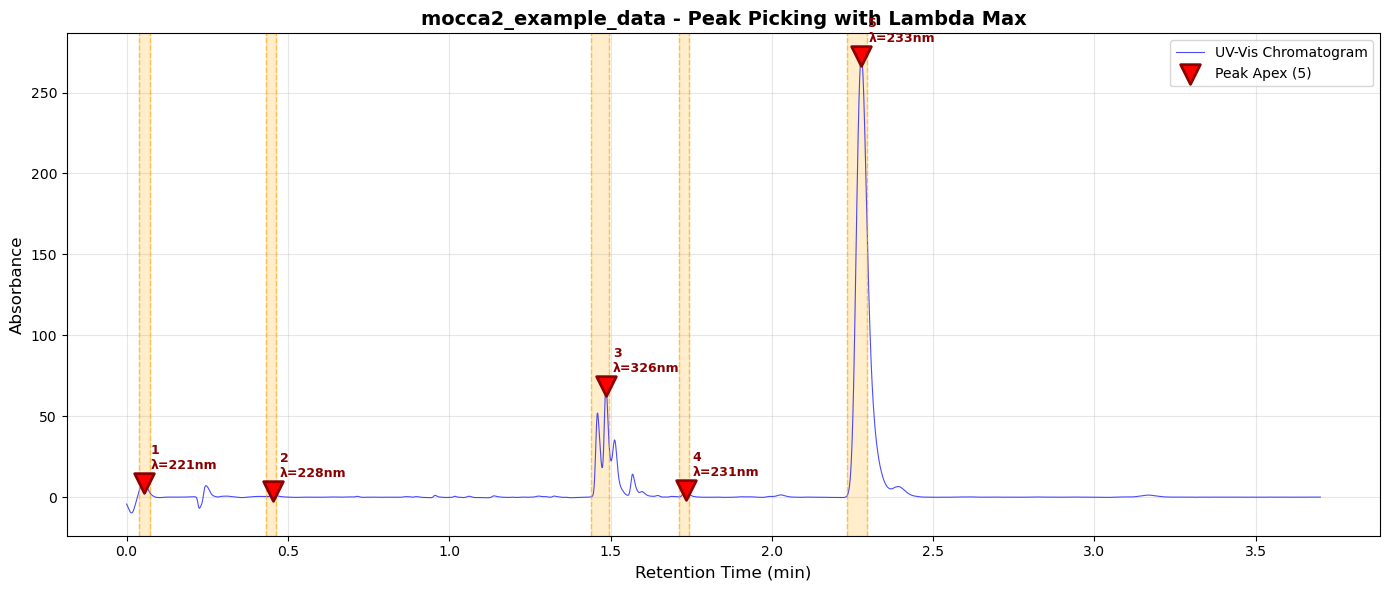

In [10]:
lcmsuv_man.plot_uvvis_with_peaks(show=True)


### Step 5: Plot MS Spectrum from LCMSUVMeasMan

You can also plot MS spectra using the LCMSUVMeasMan, which uses the underlying MS data from E2.mzML.


Plotting MS spectrum at RT = 0.052 min


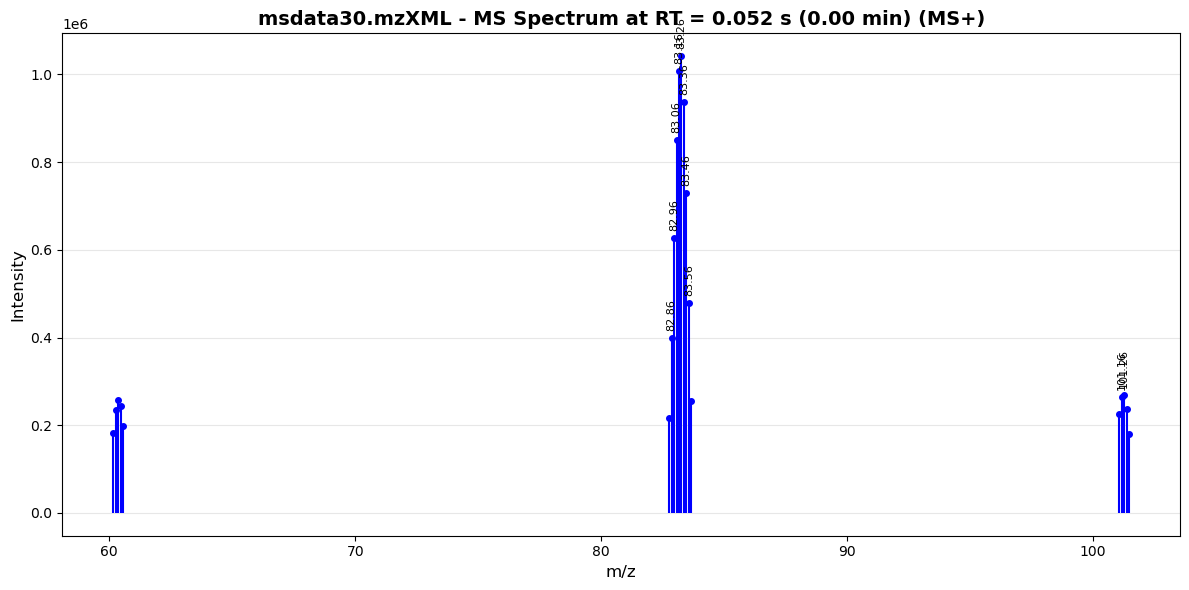

In [11]:
if len(uvvis_apex_times) > 0:
    target_rt = uvvis_apex_times[0]
    print(f"Plotting MS spectrum at RT = {target_rt:.3f} min")
    lcmsuv_man.plot_ms_spectrum(target_rt, tolerance=30.0, top_n=20, show=True)


### Step 6: Extract Peak Region and Average Spectrum

Following the mocca2 example pattern, extract a peak region and calculate the average absorption spectrum over that region. This is useful for obtaining a representative spectrum when a peak has some variation.


Extracting peak region: 0.432 - 0.463 min


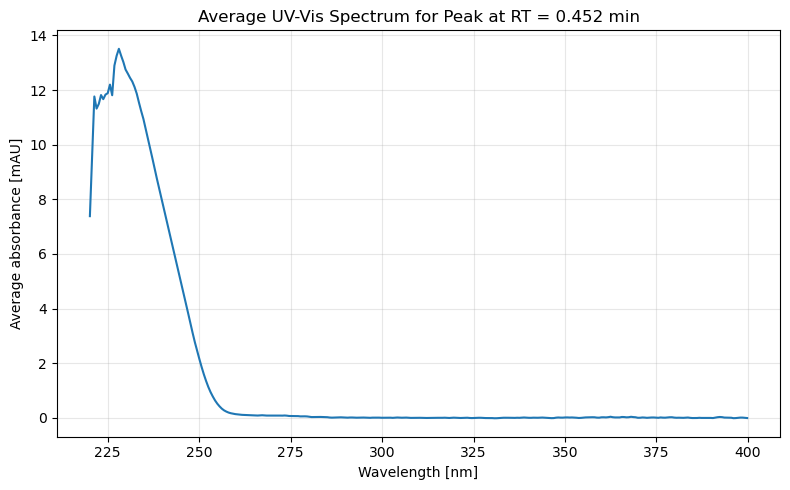


Average spectrum calculated over 38 time points
Wavelength range: 220 - 400 nm


In [13]:
import numpy as np

if len(uvvis_apex_times) > 0:
    # extract region around second peak
    target_peak_rt = uvvis_apex_times[1]
    peak_info = lcmsuv_man.get_peak(target_peak_rt)
    
    # extract region with peak (using boundaries)
    start_rt = peak_info['start_rt']
    end_rt = peak_info['end_rt']
    
    print(f"Extracting peak region: {start_rt:.3f} - {end_rt:.3f} min")
    peak_region = lcmsuv_man.chromatogram.extract_time(start_rt, end_rt)
    
    # average spectrum over the peak region
    avg_spectrum = np.mean(peak_region.data, axis=1)
    
    # plot spectrum
    fig, ax = plt.subplots(figsize=(8, 5))
    ax.plot(peak_region.wavelength, avg_spectrum)
    ax.set_xlabel("Wavelength [nm]")
    ax.set_ylabel("Average absorbance [mAU]")
    ax.set_title(f"Average UV-Vis Spectrum for Peak at RT = {target_peak_rt:.3f} min")
    ax.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()
    
    print(f"\nAverage spectrum calculated over {len(peak_region.time)} time points")
    print(f"Wavelength range: {peak_region.wavelength[0]:.0f} - {peak_region.wavelength[-1]:.0f} nm")
